# Teacher Salary Analysis

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from src.wrangle import read_and_filter_data

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 200)
plt.style.use('tableau-colorblind10')

## Acquire + Prepare

In [2]:
df = read_and_filter_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528391 entries, 0 to 528390
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Fiscal Year                       528391 non-null  Int16         
 1   Employee ID                       528391 non-null  object        
 2   Hire Date                         528391 non-null  datetime64[ns]
 3   Hire Month                        528391 non-null  Int16         
 4   Hire Year                         528391 non-null  Int16         
 5   Hire Decade                       528380 non-null  category      
 6   Years of Employment               528391 non-null  Int16         
 7   Employment Category               528390 non-null  category      
 8   Salary                            528391 non-null  Int32         
 9   Additional Pay                    528391 non-null  float64       
 10  Degree                          

In [4]:
df.describe().round().T

,count,mean,min,25%,50%,75%,max,std
Fiscal Year,528391.0,2018.0,2014.0,2016.0,2018.0,2021.0,2023.0,3.0
Hire Date,528391,2004-12-26 04:33:36.116096,1960-02-01 00:00:00,1999-09-07 00:00:00,2004-09-07 00:00:00,2012-09-04 00:00:00,2023-06-14 00:00:00,NaN
Hire Month,528391.0,8.0,1.0,8.0,9.0,9.0,12.0,3.0
Hire Year,528391.0,2004.0,1960.0,1999.0,2004.0,2012.0,2023.0,9.0
Years of Employment,528391.0,14.0,0.0,7.0,14.0,20.0,61.0,8.0
Salary,528391.0,89988.0,42306.0,75551.0,89890.0,104050.0,148657.0,19446.0
Additional Pay,528391.0,1905.0,-64036.0,0.0,7.0,1781.0,94467.0,3836.0
Salary Schedule Year,528391.0,1621.0,-1.0,2016.0,2018.0,2021.0,2024.0,803.0
Fiscal Year Rate,528391.0,3.0,0.0,2.0,3.0,4.0,5.0,1.0
Salary Schedule Rate,528391.0,2.0,0.0,2.0,3.0,3.0,4.0,1.0


In [5]:
df.select_dtypes(include='category').describe().T

,count,unique,top,freq
Hire Decade,528380,7,2000's,204634
Employment Category,528390,6,16-20,109349
Degree,528391,3,Master's,283264
Paystep,528391,24,Other,104015
Differential,528391,9,MA+,217196
Differential Category,528391,9,Master's Degree Plus,217196
Salary Schedule,528391,14,2021,145898
Contract Period,528391,3,2009-2018,269740
Salary Category,483848,4,80k-100k,183594
Additional Pay Category,528391,7,$0,240249


In [6]:
df.head(2).T

,0,1
Fiscal Year,2018,2019
Employee ID,0,0
Hire Date,2011-09-01 00:00:00,2011-09-01 00:00:00
Hire Month,9,9
Hire Year,2011,2011
Hire Decade,2010's,2010's
Years of Employment,7,8
Employment Category,6-10,6-10
Salary,71930,79005
Additional Pay,0.0,0.0


In [7]:
df.tail(2).T

,528389,528390
Fiscal Year,2017,2018
Employee ID,92843,92843
Hire Date,2006-08-31 00:00:00,2006-08-31 00:00:00
Hire Month,8,8
Hire Year,2006,2006
Hire Decade,2000's,2000's
Years of Employment,11,12
Employment Category,11-15,11-15
Salary,102196,106698
Additional Pay,13.05,0.0


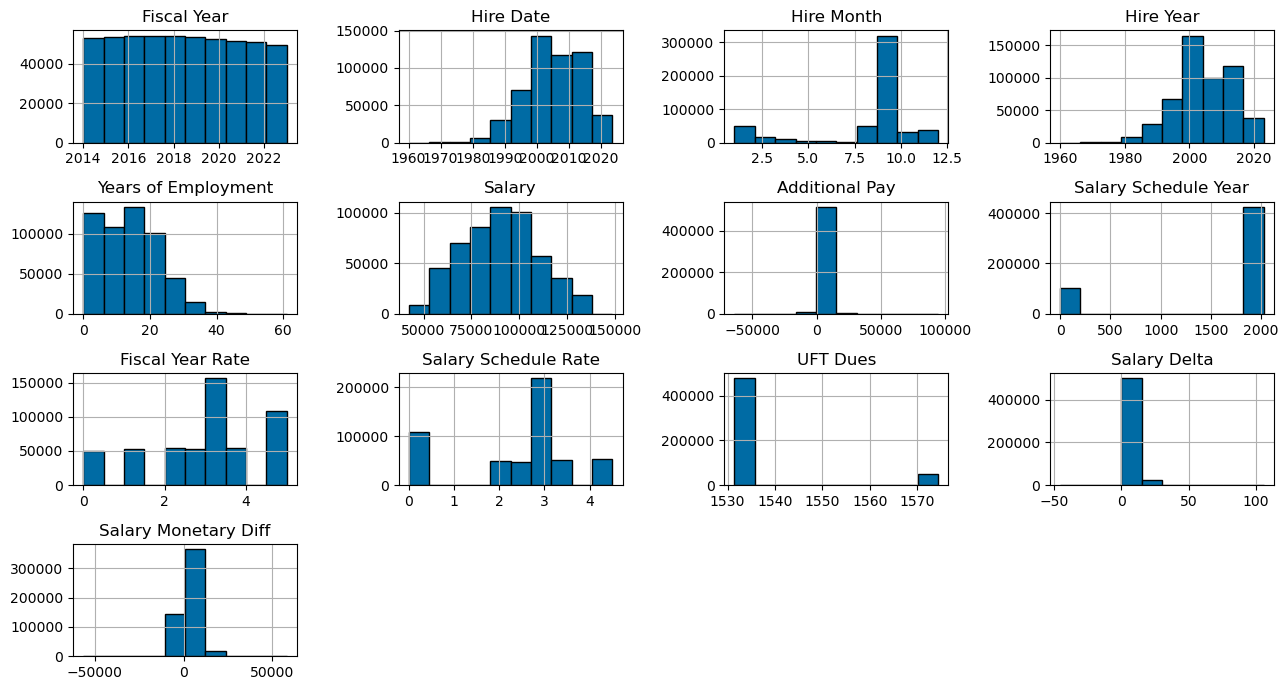

In [8]:
df.hist(figsize=(13,7), ec='black')
plt.tight_layout();

## Exploratory Data Analysis

In [9]:
numeric_cols = df.select_dtypes(include='number').columns.to_list()
category_cols = df.select_dtypes(exclude='number').columns.to_list()

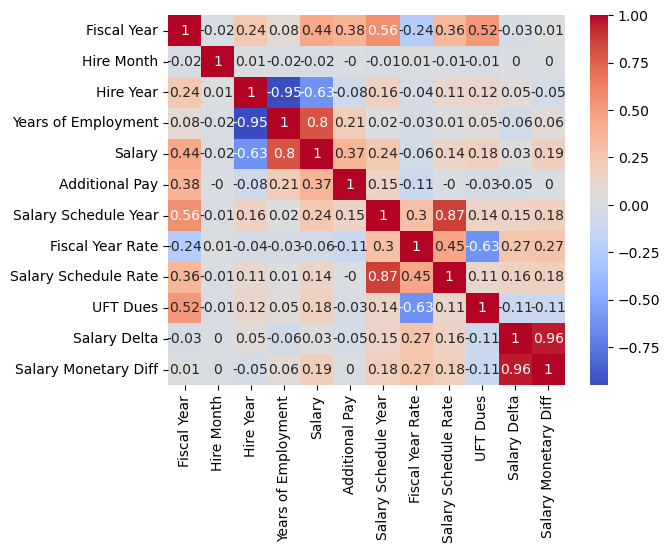

In [10]:
sns.heatmap(df[numeric_cols].corr().round(2), annot=True, cmap='coolwarm');

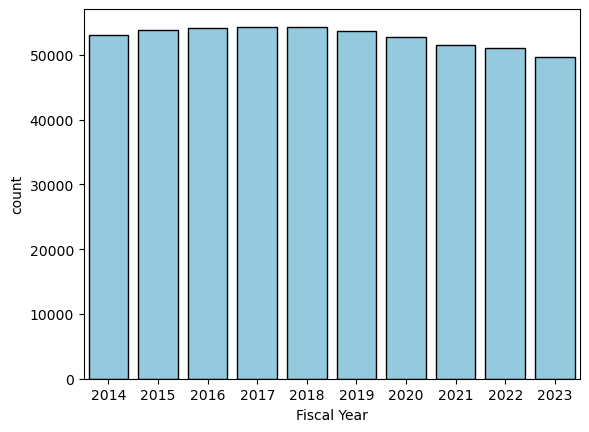

In [11]:
sns.countplot(x=df['Fiscal Year'],color='skyblue',ec='black');

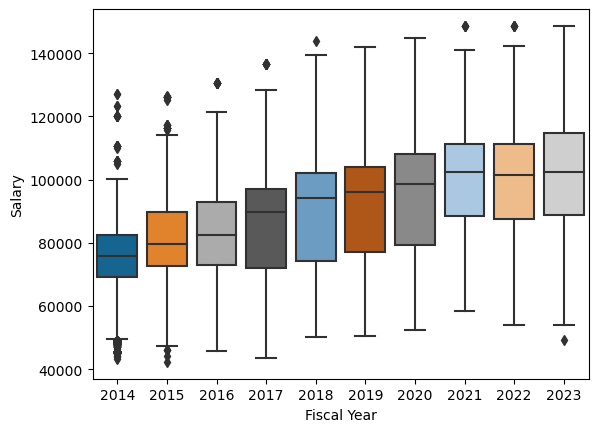

In [12]:
sns.boxplot(data=df, y='Salary', x='Fiscal Year');

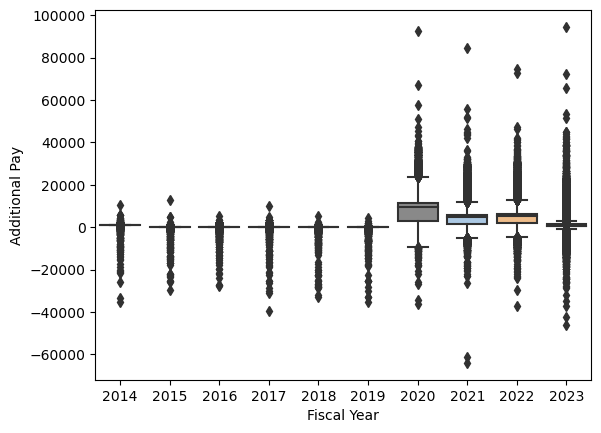

In [13]:
sns.boxplot(data=df, y='Additional Pay', x='Fiscal Year');

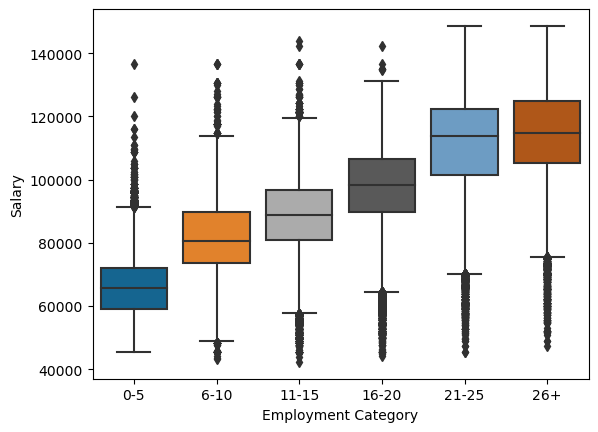

In [14]:
sns.boxplot(data=df, y='Salary', x='Employment Category');

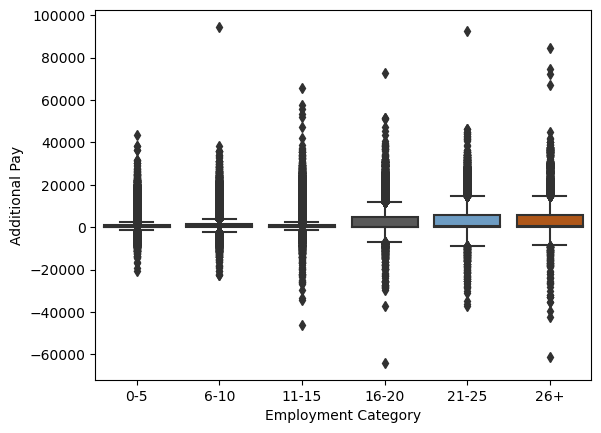

In [15]:
sns.boxplot(data=df, y='Additional Pay', x='Employment Category');

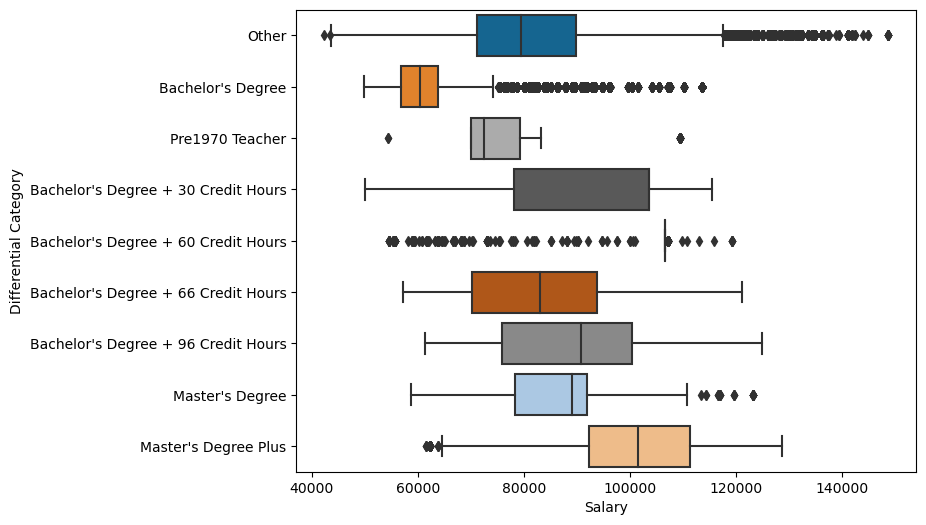

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Salary', y='Differential Category');

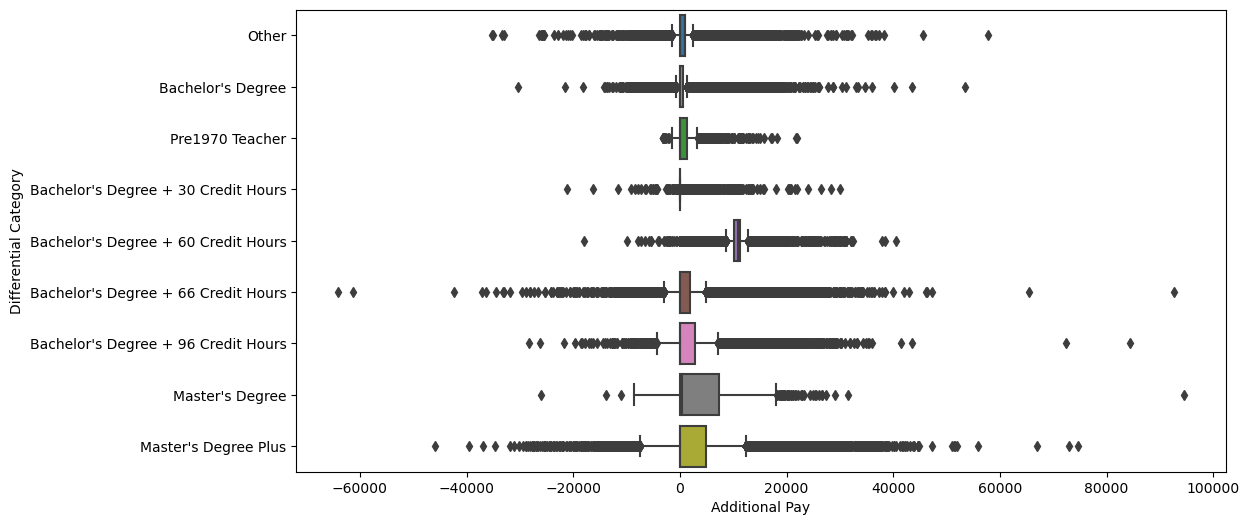

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Additional Pay',
            y='Differential Category',
            palette='tab10');

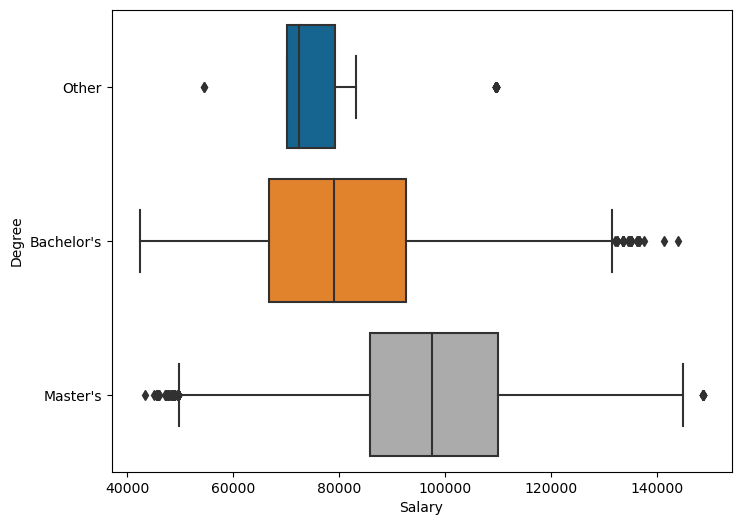

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Salary', y='Degree');

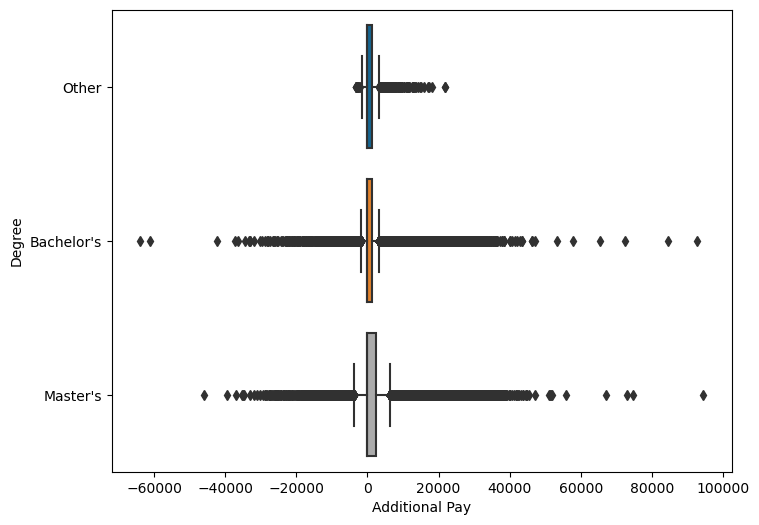

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Additional Pay', y='Degree');

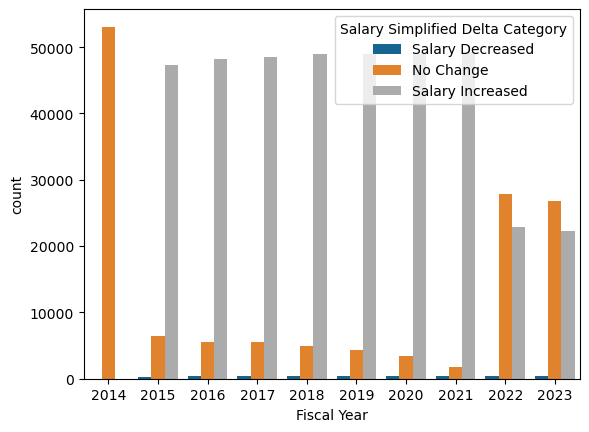

In [20]:
sns.countplot(data=df,
              x='Fiscal Year',
              hue='Salary Simplified Delta Category');

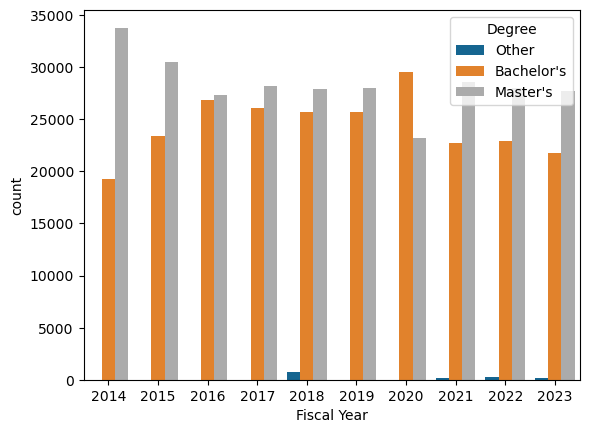

In [21]:
sns.countplot(data=df,
              x='Fiscal Year',
              hue='Degree');

In [22]:
pd.crosstab(df['Salary Category'],df['Fiscal Year'])

Fiscal Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Salary Category,,,,,,,,,,
40k-60k,8142,7930,6524,3664,3673,2656,880,4,12,14
60k-80k,28109,20236,14249,14605,11663,12025,12447,9657,10326,9481
80k-100k,12544,19395,25832,27578,22359,20645,16004,13286,13192,12759
100k-120k,4292,6285,7496,8439,16579,13340,17694,17953,16504,15375


In [23]:
pd.crosstab(df['Salary Simplified Delta Category'],df['Fiscal Year'])

Fiscal Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Salary Simplified Delta Category,,,,,,,,,,
Salary Decreased,0,207,390,357,461,437,457,418,359,447
No Change,53087,6371,5585,5494,4937,4338,3357,1761,27805,26817
Salary Increased,4,47281,48146,48477,48943,48950,48950,49271,22956,22328


In [24]:
pd.crosstab(df['Additional Pay Category'],df['Fiscal Year'])

Fiscal Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Additional Pay Category,,,,,,,,,,
<$0,157,337,346,328,333,291,921,1738,1814,4669
$0,854,46429,45936,48412,49580,48578,41,73,89,257
0-$500,387,6503,6950,4726,3797,4805,2539,6274,2147,18400
$500-$1K,46645,527,228,210,606,45,2394,2787,3853,10377
$1k-$3K,5035,60,658,638,24,4,6973,8211,9509,8708
$3K-$10K,12,2,3,14,1,2,16494,30464,29698,5306
$10K+,1,1,0,0,0,0,23402,1903,4010,1875


In [25]:
pd.crosstab(df['Additional Pay Category'],df['Salary Schedule Year'])

Salary Schedule Year,-1,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2024
Additional Pay Category,,,,,,,,,,,,
<$0,747,0,0,222,321,336,344,287,875,7782,0,20
$0,39258,346,24,16910,43916,47405,47738,43610,85,870,16,71
0-$500,6861,73,5,2583,6308,4167,3679,4423,2517,25881,12,19
$500-$1K,47403,0,2,455,225,214,697,162,2345,16149,0,20
$1k-$3K,6345,1,3,371,628,675,119,188,6760,24671,0,59
$3K-$10K,2585,0,0,251,2,132,43,82,15093,63079,0,729
$10K+,816,0,0,66,0,12,12,32,18916,7466,0,3872


In [26]:
pd.crosstab(df['Additional Pay Category'],df['Salary Schedule Year']).sum(axis=1)

Additional Pay Category
<$0          10934
$0          240249
0-$500       56528
$500-$1K     67672
$1k-$3K      39820
$3K-$10K     81996
$10K+        31192
dtype: int64

In [27]:
pd.crosstab(df['Additional Pay Category'],df['Salary Schedule'])

Salary Schedule,Other,2013,2014 May,2014 Sept,2015,2016,2017,2018 May,2018 June,2019,2020,2021,2022,2024
Additional Pay Category,,,,,,,,,,,,,,
<$0,747,0,0,0,222,321,336,16,328,287,875,7782,0,20
$0,39258,346,24,0,16910,43916,47405,11,47727,43610,85,870,16,71
0-$500,6861,73,5,0,2583,6308,4167,67,3612,4423,2517,25881,12,19
$500-$1K,47403,0,0,2,455,225,214,115,582,162,2345,16149,0,20
$1k-$3K,6345,1,0,3,371,628,675,98,21,188,6760,24671,0,59
$3K-$10K,2585,0,0,0,251,2,132,42,1,82,15093,63079,0,729
$10K+,816,0,0,0,66,0,12,12,0,32,18916,7466,0,3872


In [28]:
# dues_2013 = 49.89
# dues_2016 = 56.10 
# dues_2018 = 58.31
# dues_2022 = 63.81
# dues_2023 = 65.60

# df.where(lambda x: 2013 < x <, ))

In [29]:
# h_test_1 = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Category']))
# h_test_2 = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Delta Category']))
# h_test_3 = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Monetary Diff Category']))
# h_test_4 = stats.chi2_contingency(pd.crosstab(df['Salary Category'], df['Salary Delta Category']))
# h_test_5 = stats.chi2_contingency(pd.crosstab(df['Salary Category'], df['Salary Monetary Diff Category']))
# h_test_6 = stats.chi2_contingency(pd.crosstab(df_2021_to_2023['Degree'], df_2021_to_2023['Salary Simplified Delta Category']))